In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

###### Load the dataset

In [147]:
my_df = pd.read_excel('D:DSMM_Term_2/flight_price.xlsx')

###### Dimension of Dataframe

In [148]:
print(my_df.ndim)

2


###### Number of rows and columns of Dataframe 

In [149]:
print(my_df.shape)

(10683, 11)


In [150]:
my_df.size

117513

my_df['date'] = my_df['Date_of_Journey'].str.split('/').str[0]
my_df['month'] = my_df['Date_of_Journey'].str.split('/').str[1]
my_df['year'] = my_df['Date_of_Journey'].str.split('/').str[2]

my_df.drop('Date_of_Journey',axis=1, inplace=True)


In [151]:
my_df['dep_hour'] = my_df['Dep_Time'].str.split(':').str[0]
my_df['dep_min'] = my_df['Dep_Time'].str.split(':').str[1]
my_df.drop('Dep_Time',axis=1,inplace=True)


In [152]:
my_df['Arrival_hour'] = my_df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
my_df['Arrival_min'] = my_df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
my_df.drop('Arrival_Time',axis=1,inplace=True)

In [153]:
def convert_into_minutes(Duration):
    total_minutes = 0
    parts = Duration.split()
    for i in range(len(parts)):
        if 'h' in parts[i]:
            total_minutes += int(parts[i].replace('h', '')) * 60
        elif 'm' in parts[i]:
            total_minutes += int(parts[i].replace('m', ''))
    return total_minutes

In [154]:
my_df['Duration'] = my_df['Duration'].apply(convert_into_minutes)

In [155]:
my_df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [156]:
my_df.drop(['Additional_Info', 'Route'], axis=1, inplace=True)

In [157]:
my_df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [158]:
my_df['Airline']=my_df['Airline'].map({'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3, 'SpiceJet':4, 'Vistara':5, 'GoAir':6, 'Air Asia':7,'Multiple carriers Premium economy':3, 'Jet Airways Business':0, 'Vistara Premium economy':5, 'Trujet':4})

In [159]:
my_df['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [160]:
my_df['Source']=my_df['Source'].map({'Delhi':0, 'Kolkata':1, 'Banglore':2, 'Mumbai':3, 'Chennai':4})

In [161]:
my_df['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [162]:
my_df['Destination']=my_df['Destination'].map({'Cochin':0, 'Banglore':1, 'Delhi':2, 'New Delhi':3, 'Hyderabad':4})

In [163]:
my_df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [164]:
my_df['Total_Stops']=my_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4, 'nan':1})

In [165]:
my_df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,dep_hour,dep_min,Arrival_hour,Arrival_min
0,1,24/03/2019,2,3.0,170,0.0,3897,22,20,01,10
1,2,1/05/2019,1,1.0,445,2.0,7662,05,50,13,15
2,0,9/06/2019,0,0.0,1140,2.0,13882,09,25,04,25
3,1,12/05/2019,1,1.0,325,1.0,6218,18,05,23,30
4,1,01/03/2019,2,3.0,285,1.0,13302,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,7,9/04/2019,1,1.0,150,0.0,4107,19,55,22,25
10679,2,27/04/2019,1,1.0,155,0.0,4145,20,45,23,20
10680,0,27/04/2019,2,2.0,180,0.0,7229,08,20,11,20
10681,5,01/03/2019,2,3.0,160,0.0,12648,11,30,14,10


Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.


In [166]:
my_df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,dep_hour,dep_min,Arrival_hour,Arrival_min
0,1,24/03/2019,2,3.0,170,0.0,3897,22,20,01,10
1,2,1/05/2019,1,1.0,445,2.0,7662,05,50,13,15
2,0,9/06/2019,0,0.0,1140,2.0,13882,09,25,04,25
3,1,12/05/2019,1,1.0,325,1.0,6218,18,05,23,30
4,1,01/03/2019,2,3.0,285,1.0,13302,16,50,21,35


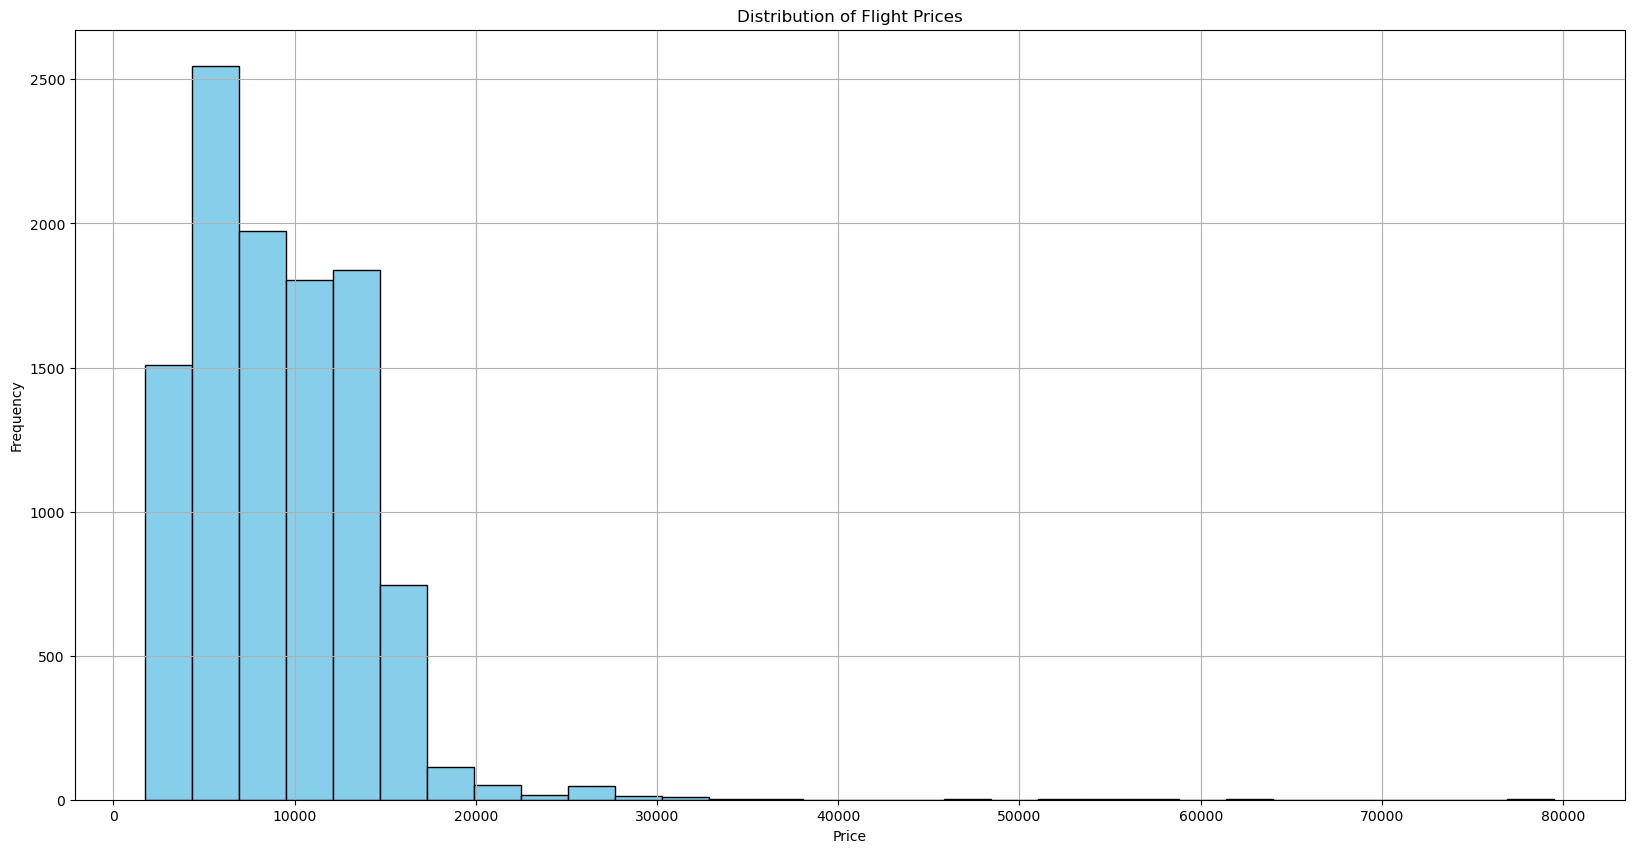

In [167]:
plt.figure(figsize=(20,10))
plt.hist(my_df['Price'], bins=30, color='skyblue', edgecolor='black') 
#bins will determines the number of intervals(or "bins") into which the data range will
#be divided
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [168]:
#Finding the maximum price
max_price = my_df['Price'].max()
min_price = my_df['Price'].min()
print(f"Maximu price of the flight is {max_price}")
print(f"Minimum price of the flight is {min_price}")

#Finding price range
price_range = max_price - min_price
print(f"Price range is: {price_range}")

#Price range using np.ptp() function of numpy
check_range = np.ptp(my_df['Price'])
print(f"New value of price range is: {check_range}")

Maximu price of the flight is 79512
Minimum price of the flight is 1759
Price range is: 77753
New value of price range is: 77753


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

<Figure size 1000x600 with 0 Axes>

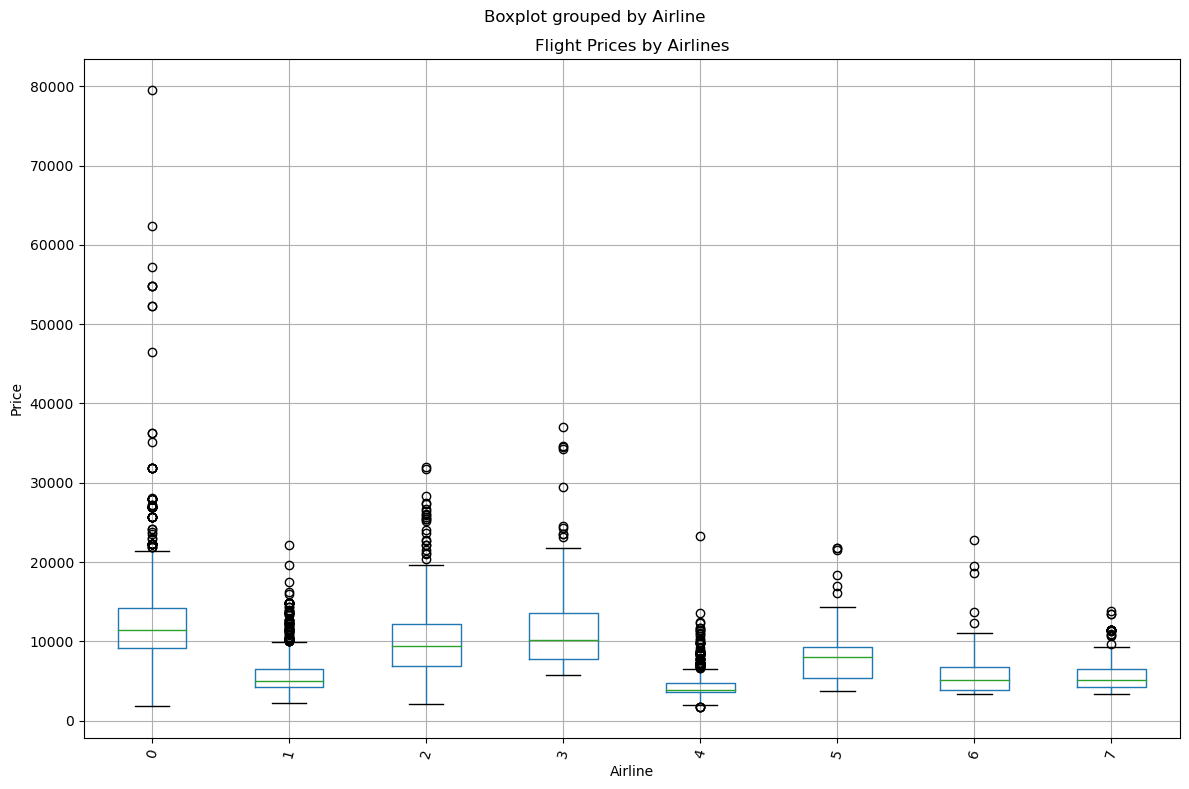

In [169]:
plt.figure(figsize=(10,6))
my_df.boxplot(column='Price', by='Airline', figsize=(12,8),rot=75)
plt.title("Flight Prices by Airlines")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

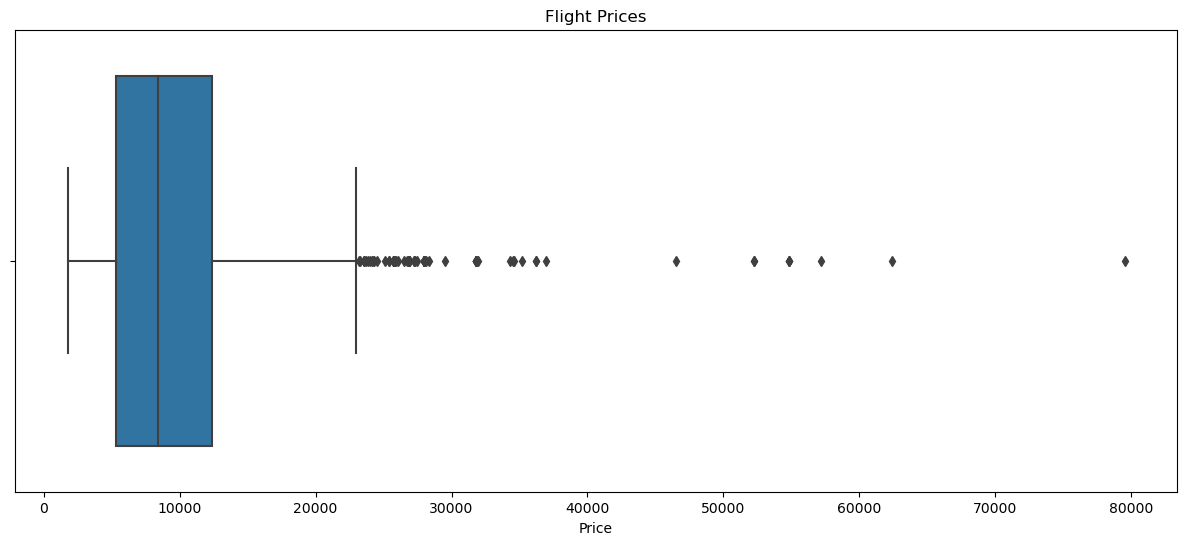

In [170]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Price', data=my_df)
plt.title('Flight Prices')
plt.xlabel('Price')
plt.show()

In [171]:
my_df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [172]:
"""
I would analyze Date_of_Journey, Duration and Price features for the peak travel season.Also, I can use bar-plot for the visualization.
"""

'\nI would analyze Date_of_Journey, Duration and Price features for the peak travel season.Also, I can use bar-plot for the visualization.\n'

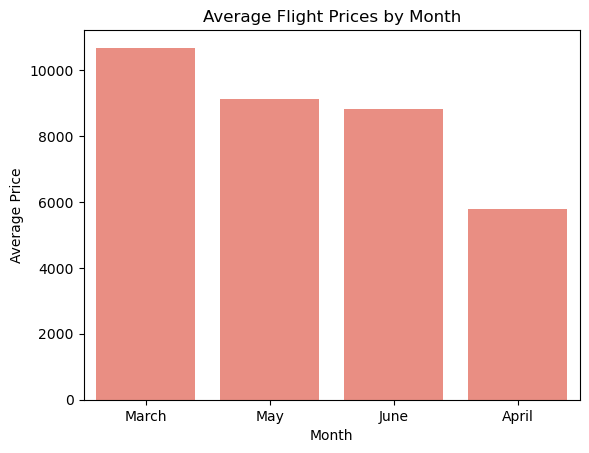

In [175]:
my_df['Date_of_Journey'] = pd.to_datetime(my_df['Date_of_Journey'], dayfirst=True)
my_df['Month'] = my_df['Date_of_Journey'].dt.month_name()

sns.barplot(x='Month', y='Price', data=my_df, color='salmon', errorbar=None, estimator='mean')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [176]:
"""
We need to go through Date of Journey, Total stops, Source and Destinations and Airline features to uncover the trends in flight prices.
For Visualization we can use Boxplot, Time Series plots and Bar charts.
"""

'\nWe need to go through Date of Journey, Total stops, Source and Destinations and Airline features to uncover the trends in flight prices.\nFor Visualization we can use Boxplot, Time Series plots and Bar charts.\n'

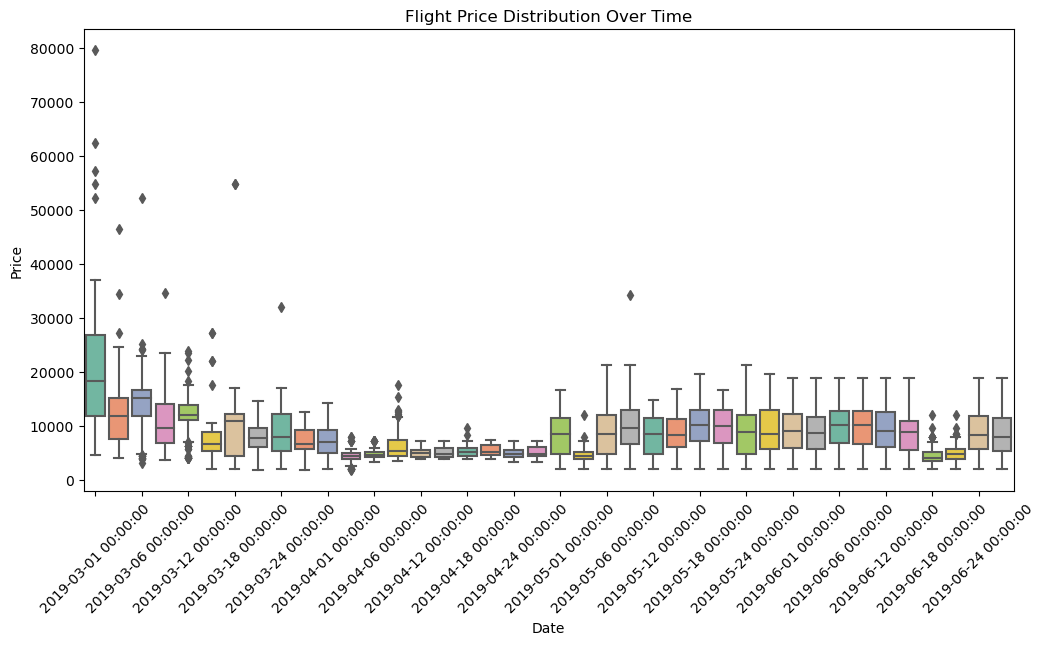

In [178]:
my_df['Date_of_Journey'] = pd.to_datetime(my_df['Date_of_Journey'], dayfirst=True)
my_df.sort_values(by='Date_of_Journey', inplace=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Date_of_Journey', y='Price', data=my_df, palette='Set2')
plt.title('Flight Price Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))

plt.show()

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [184]:
my_df.describe()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
count,10683.000000,10683,10683.000000,10302.000000,10683.000000,10682.000000,10683.000000
mean,1.709913,2019-05-04 19:56:41.853411840,1.018441,1.066298,643.093232,0.824190,9087.064121
min,0.000000,2019-03-01 00:00:00,0.000000,0.000000,5.000000,0.000000,1759.000000
25%,0.000000,2019-03-27 00:00:00,0.000000,0.000000,170.000000,0.000000,5277.000000
50%,1.000000,2019-05-15 00:00:00,1.000000,1.000000,520.000000,1.000000,8372.000000
75%,3.000000,2019-06-06 00:00:00,2.000000,2.000000,930.000000,1.000000,12373.000000
max,7.000000,2019-06-27 00:00:00,4.000000,4.000000,2860.000000,4.000000,79512.000000
std,1.847896,NaN,1.100942,1.236821,507.862001,0.675229,4611.359167


In [180]:
"""
To identify the factors affecting flight prices, We can see date of journey, Route, Airline, Total Stops and Duration Feature.
To present our findings we can use time series plots, bar charts, box plots, Scatter plots.

"""

'\nTo identify the factors affecting flight prices, We can see date of journey, Route, Airline, Total Stops and Duration Feature.\nTo present our findings we can use time series plots, bar charts, box plots, Scatter plots.\n\n'

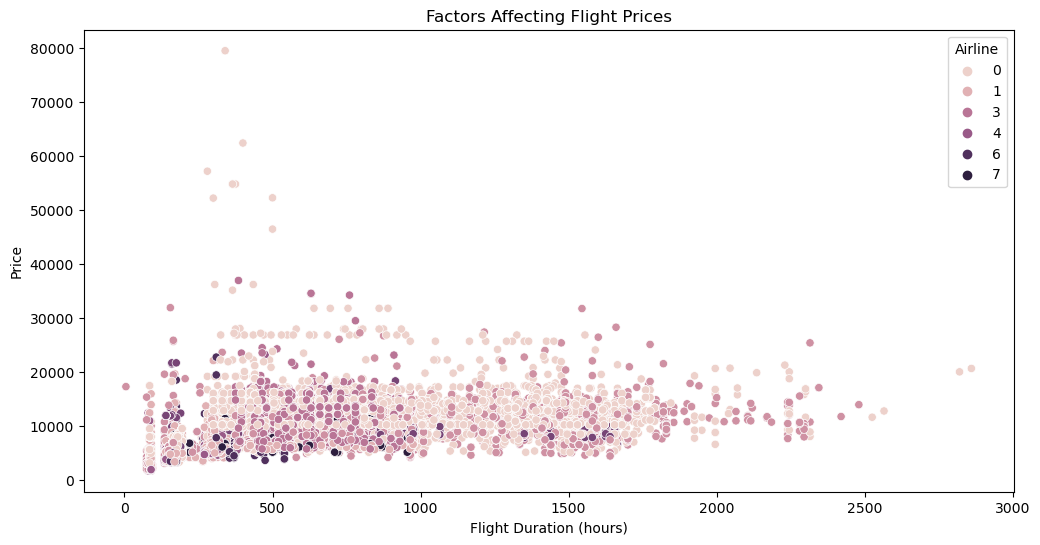

In [185]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Duration', y='Price', hue='Airline', data=my_df)
plt.title('Factors Affecting Flight Prices')
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Price')
plt.legend(title='Airline', bbox_to_anchor=(1, 1))
plt.show()